In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deleak = pd.read_pickle('./data/flow_05.pkl')
preds = pd.read_pickle('data/preds3.pkl')
top15 = pd.read_pickle('./data/top15.pkl')
y_scaler = pd.read_pickle('./data/y_scaler.pkl')

In [3]:
p = np.array(preds)
pp = np.vstack([p for i in range(24)])
ppp = pp.T
desc_preds = y_scaler.inverse_transform(ppp)
desc_preds = desc_preds[:, 0]

In [4]:
top15.drop(['flow'], axis=1, inplace=True)

In [5]:
mse_dict = {
    'time' : list(top15.index[1:]),
    'predictions' : list(desc_preds)
}

In [6]:
mse_df = pd.DataFrame.from_dict(mse_dict, orient='columns')

In [7]:
mse_df.set_index('time', inplace=True)

In [8]:
mse = pd.concat([mse_df.resample('H').mean(), deleak.resample('H').mean()], axis=1, join='inner')

In [9]:
mse['abs_error'] = abs(mse.predictions - mse.flow)
mse['error'] = mse.predictions - mse.flow

In [10]:
mse.abs_error.mean()

10.602380647729262

In [11]:
mse_daily = mse.resample('D').sum()

In [12]:
mse_daily.error.mean()

17.50707517723393

In [13]:
mse_daily.error.mean() / 24

0.7294614657180803

In [14]:
mse_quarterly = mse_daily.resample('Q').sum()

In [15]:
mse_daily.flow.mean()

1315.3128332736464

In [16]:
mse_quarterly

predictions           flow     abs_error         error
time                                                                
2013-12-31   33986.824829   31762.336195   6529.156753   2224.488634
2014-03-31  121263.023281  115058.259779  19256.077125   6204.763502
2014-06-30  121396.638214  123281.943399  18616.002572  -1885.305185
2014-09-30  121524.918484  124092.320701  21611.141957  -2567.402218
2014-12-31  123764.564693  120568.146710  20129.419253   3196.417984
2015-03-31  120755.171961  108677.789872  21142.228470  12077.382089
2015-06-30  120892.135483  115505.340782  17774.474784   5386.794701
2015-09-30  121329.002306  120453.580294  21353.434562    875.422012
2015-12-31  122827.137474  130395.065982  20802.168232  -7567.928508
2016-03-31  122493.648411  131030.264216  23697.618984  -8800.466068
2016-06-30  121171.574528  118763.898910  20651.372189   2033.616223
2016-09-30  121763.989109  115323.509320  20776.183766   6440.479789
2016-12-31  123772.916105  138108.112350  44197.091345 -14335.196245
2017-03-31  121066.495022  108726.712316  25194.529894  12339.782706
2017-06-30  121545.733770  128147.474470  18797.879791  -6794.520792
2017-09-30  121112.726284  124092.941318  23006.914998  -2980.215034
2017-12-31  123102.090815   85415.207082  45519.160228  37686.883732
2018-03-31  120011.390818  115841.584256  17307.707862   4169.806562
2018-06-30  121305.192478  133617.739034  23780.129151 -12312.546556
2018-09-30  122038.780014  132405.966166  24249.331213 -10367.186152
2018-12-31  123078.542995  118756.028400  18456.532310   4201.566687
2019-03-31  119053.020012  113156.186829  19398.360220   6948.010361
2019-06-30  119922.193974  122170.990206  24325.029103  -2330.860236
2019-09-30   56406.123459   53922.730454  10854.082941   2483.393005

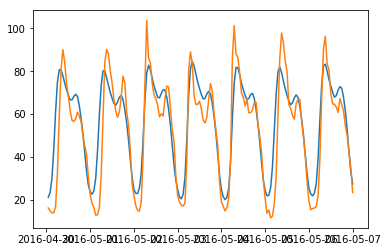

In [21]:
plt.plot(mse.predictions[21000:21000+7*24])
plt.plot(mse.flow[21000:21000+7*24])